<a href="https://colab.research.google.com/github/RiyadAhmedCS/CSNEA2022/blob/main/Working_ESRGAN_Upscaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd /content/Real-ESRGAN/
%ls
!chmod +x setup.py

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 403, done.
remote: Counting objects: 100% (403/403), done.
remote: Compressing objects: 100% (256/256), done.
remote: Total 403 (delta 217), reused 282 (delta 113), pack-reused 0
Receiving objects: 100% (403/403), 3.20 MiB | 15.92 MiB/s, done.
Resolving deltas: 100% (217/217), done.
/content/Real-ESRGAN
assets/          inference_realesrgan.py  README.md         setup.py
CONTRIBUTING.md  inputs/                  realesrgan/       Training.md
docs/            LICENSE                  requirements.txt  VERSION
experiments/     MANIFEST.in              scripts/
FAQ.md           options/                 setup.cfg


In [ ]:
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

     |████████████████████████████████| 149 kB 5.0 MB/s 
     |████████████████████████████████| 5.8 MB 39.1 MB/s 
     |████████████████████████████████| 185 kB 48.7 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.4-py3-none-any.whl size=185575 sha256=193def2b14c9e9b42287e7b3def277dc962bcad1f76d3416eefa1b5582facac9
  Stored in directory: /root/.cache/pip/wheels/ae/4c/74/8658a322336367833c17a3777611cb59a6a5dcfb904afc64cb
Successfully built basicsr
     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 177 kB 43.9 MB/s 
  Created wheel for facexlib: filename=facexlib-0.2.1.0-py3-none-any.whl size=57092 sha256=567ed7b55ad4c0383faf21eee9317227a1352816c38caefe063b0728e3c447d2
  Stored in directory: /root/.cache/pip/wheels/e3/33/8d/70d77abe7eca95c8b0f32f12867234c45c1089db9db7102d03
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=9c3772235a38bcd6a9ef997cd468ae2cbf1e1aa8a78f5d33e16a5c9b72898d45
  Sto

In [ ]:
import os
from google.colab import drive
from google.colab import files

drive.mount('/content/gdrive/')
path = "/content/gdrive/MyDrive/nea_files/ESRGANtest"
os.chdir(path)

Mounted at /content/gdrive/


In [ ]:
%cp -r /content/gdrive/MyDrive/nea_files/ESRGANtest /content/Real-ESRGAN/imgs
%cd /content/Real-ESRGAN/
%ls

/content/Real-ESRGAN
assets/          imgs/                    options/              scripts/
CONTRIBUTING.md  inference_realesrgan.py  README.md             setup.cfg
docs/            inputs/                  realesrgan/           setup.py*
experiments/     LICENSE                  realesrgan.egg-info/  Training.md
FAQ.md           MANIFEST.in              requirements.txt      VERSION


In [ ]:
!python inference_realesrgan.py --model_path experiments/pretrained_models/RealESRGAN_x4plus.pth --input /content/Real-ESRGAN/imgs --netscale 4 --outscale 3.5 --half --face_enhance

Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:01<00:00, 101MB/s] 
Downloading: "https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth" to /usr/local/lib/python3.7/dist-packages/gfpgan/weights/GFPGANCleanv1-NoCE-C2.pth

100% 332M/332M [00:03<00:00, 100MB/s]
Testing 0 1
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Testing 1 2
Testing 2 3
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior 

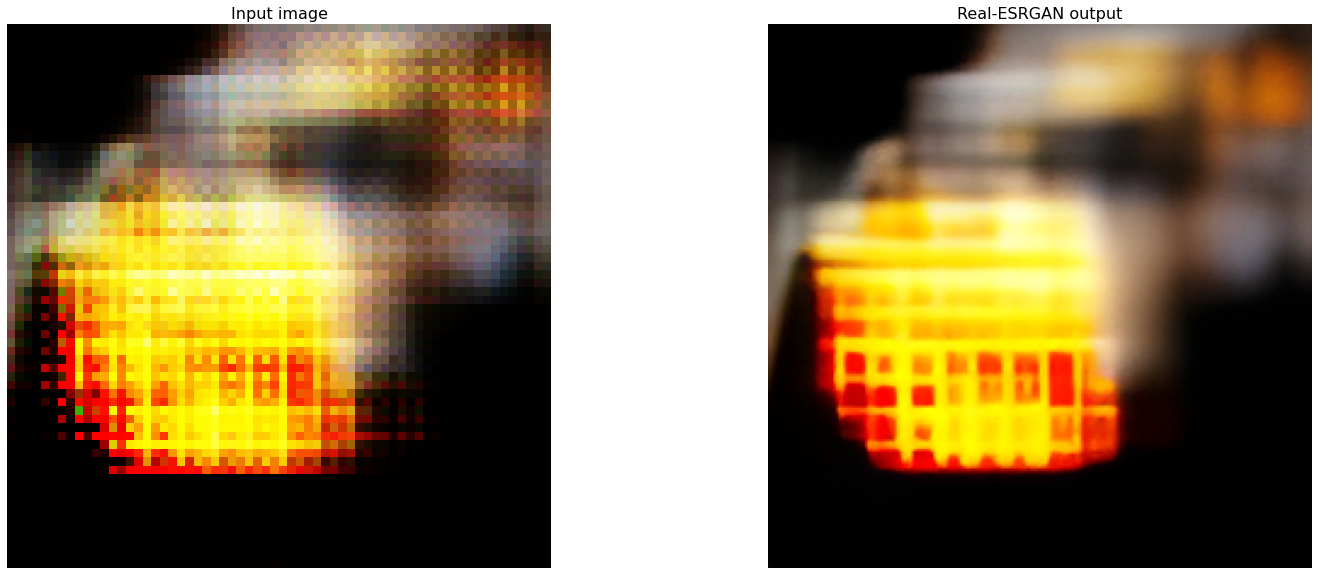

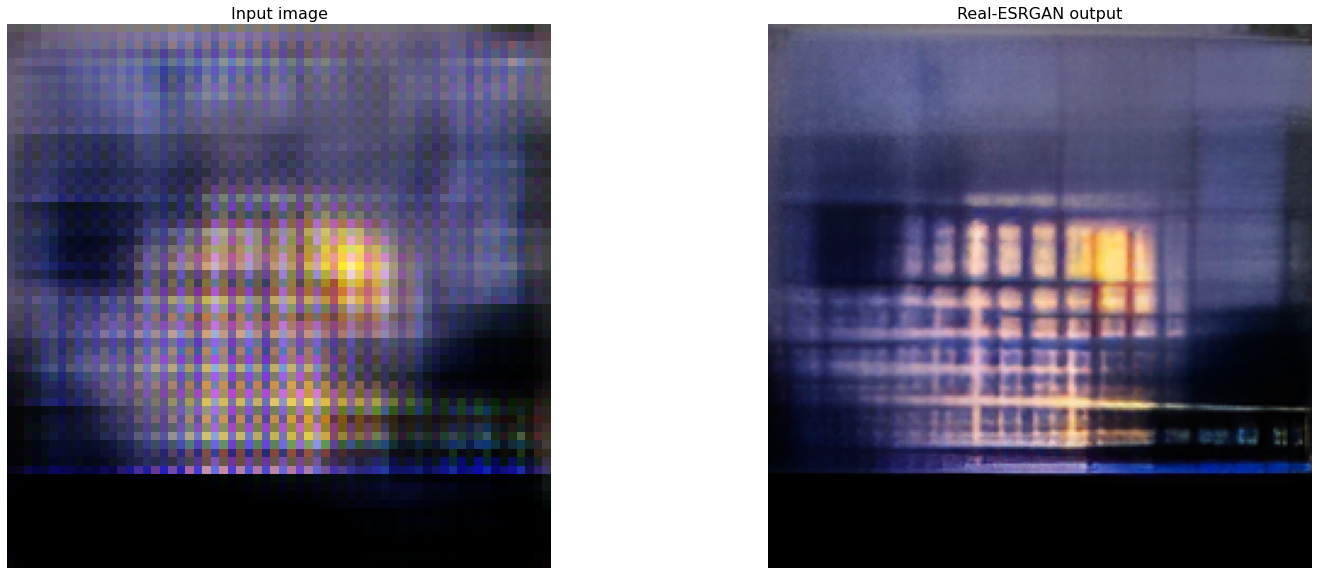

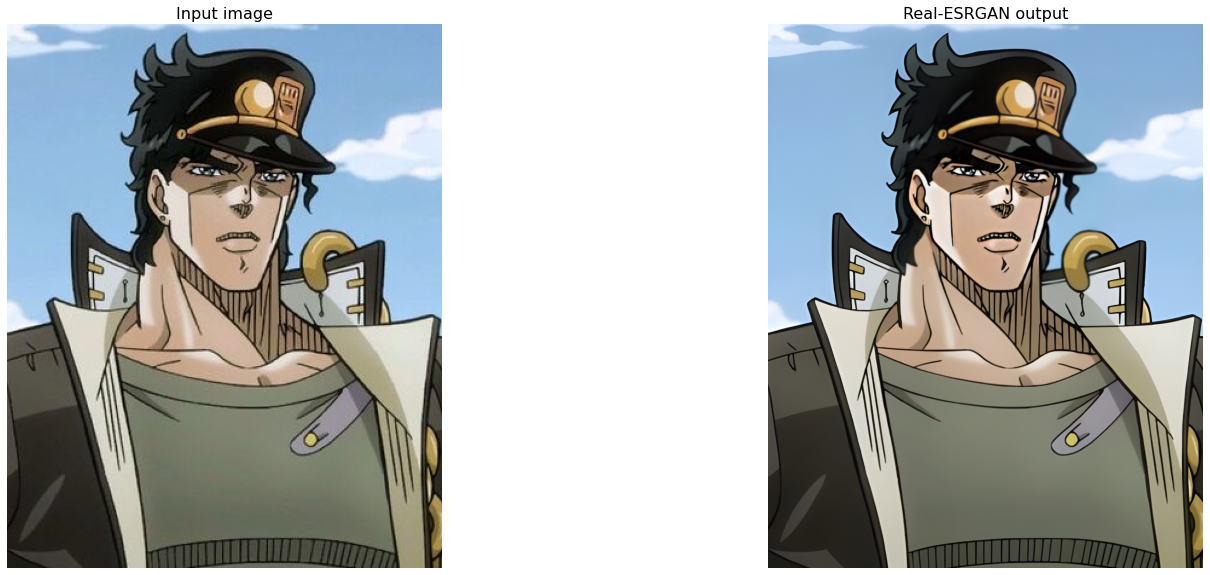

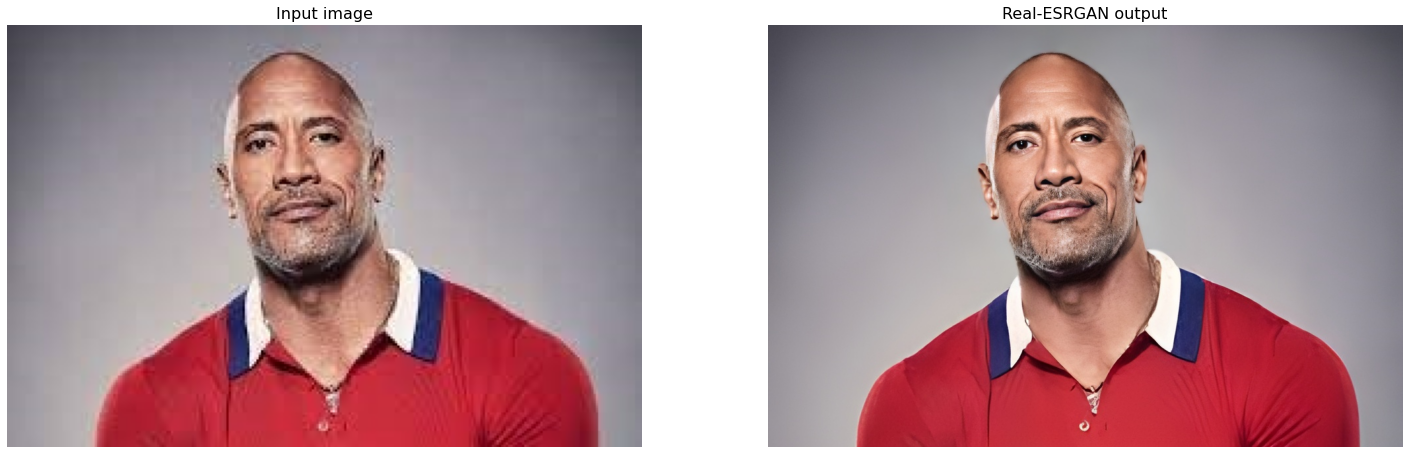

In [ ]:
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'imgs'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

In [ ]:
%cp -r /content/Real-ESRGAN/results/ /content/gdrive/MyDrive/nea_files/ESRGANtest/upscaled/